# ANALYSE EXPLORATOIRE - CHURN PREDICTION FORTUNEO BANQUE

### **Objectif** : Identifier les clients susceptibles de quitter la banque

### **Dataset** : Binary Classification with a Bank Churn Dataset

### **Date** : Janvier 2026

### 1. IMPORTATION DES BIBLIOTHÈQUES

## importation des modules

pip install numpy==1.26.4

In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly (optionnel - commenté si problème de compatibilité NumPy 2.0)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("Plotly importé avec succès")
except Exception as e:
    PLOTLY_AVAILABLE = False
    print(f"Plotly non disponible (erreur: {str(e)[:50]}...)")
    print("   Utilisation de Matplotlib/Seaborn uniquement")

# Stats
from scipy import stats
from scipy.stats import chi2_contingency

# Configuration
import warnings
warnings.filterwarnings('ignore')

Plotly importé avec succès


## Configuration

In [6]:
# Style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration des affichages
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Bibliothèques importées avec succès!")

Bibliothèques importées avec succès!


## Collecte de données

In [7]:
import os
os.getcwd()

'/Users/Apple/Desktop/Projets/machine_learning/Projet-Machine-Learning-No2/notebooks'

In [8]:
# ## 2. CHARGEMENT DES DONNÉES

# Chargement du dataset
train_df = pd.read_csv('../data/raw/train.csv')
test_df  = pd.read_csv('../data/raw/test.csv')

print("="*60)
print("INFORMATIONS SUR LES DATASETS")
print("="*60)
print(f"\n Train set: {train_df.shape[0]} lignes × {train_df.shape[1]} colonnes")
print(f" Test set:  {test_df.shape[0]} lignes × {test_df.shape[1]} colonnes")
print(f"\n Données chargées avec succès!")

INFORMATIONS SUR LES DATASETS

 Train set: 165034 lignes × 14 colonnes
 Test set:  110023 lignes × 13 colonnes

 Données chargées avec succès!


In [9]:
# Aperçu des premières lignes
print("\n Aperçu des données d'entraînement:\n")
display(train_df.head(10))


 Aperçu des données d'entraînement:



,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.00,3,0.00,2,1.00,0.00,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.00,1,0.00,2,1.00,1.00,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.00,10,0.00,2,1.00,0.00,184866.69,0
3,3,15741417,Kao,581,France,Male,34.00,2,148882.54,1,1.00,1.00,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.00,5,0.00,2,1.00,1.00,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.00,4,131778.58,1,1.00,0.00,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.00,8,144772.69,1,1.00,0.00,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.00,1,138476.41,1,1.00,0.00,106851.60,0
8,8,15691707,Manna,676,France,Male,43.00,4,0.00,2,1.00,0.00,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.00,4,81274.33,1,1.00,1.00,170843.07,0


## ANALYSE DESCRIPTIVE GÉNÉRALE

In [10]:
def display_dataset_info(df, dataset_name="Dataset"):
    """Affiche les informations complètes sur le dataset"""
    
    print("="*80)
    print(f"ANALYSE DESCRIPTIVE - {dataset_name.upper()}")
    print("="*80)
    
    # Informations générales
    print(f"\n Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f" Mémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Types de variables
    print("\n Types de variables:")
    print(df.dtypes.value_counts())
    
    # Valeurs manquantes
    print("\n Valeurs manquantes:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print(" Aucune valeur manquante détectée!")
    else:
        missing_pct = (missing / len(df)) * 100
        missing_df = pd.DataFrame({
            'Colonne': missing.index,
            'Manquantes': missing.values,
            'Pourcentage': missing_pct.values
        })
        missing_df = missing_df[missing_df['Manquantes'] > 0].sort_values('Manquantes', ascending=False)
        display(missing_df)
    
    # Valeurs dupliquées
    duplicates = df.duplicated().sum()
    print(f"\n Lignes dupliquées: {duplicates} ({(duplicates/len(df)*100):.2f}%)")
    
    # Statistiques descriptives
    print("\n Statistiques descriptives des variables numériques:")
    display(df.describe().T)
    
    print("\n" + "="*80)

In [11]:
# Analyse du train set
display_dataset_info(train_df, "Train Set")

ANALYSE DESCRIPTIVE - TRAIN SET

 Dimensions: 165034 lignes × 14 colonnes
 Mémoire utilisée: 39.73 MB

 Types de variables:
int64      6
float64    5
object     3
Name: count, dtype: int64

 Valeurs manquantes:
 Aucune valeur manquante détectée!

 Lignes dupliquées: 0 (0.00%)

 Statistiques descriptives des variables numériques:


,count,mean,std,min,25%,50%,75%,max
id,165034.00,82516.50,47641.36,0.00,41258.25,82516.50,123774.75,165033.00
CustomerId,165034.00,15692005.02,71397.82,15565701.00,15633141.00,15690169.00,15756824.00,15815690.00
CreditScore,165034.00,656.45,80.10,350.00,597.00,659.00,710.00,850.00
Age,165034.00,38.13,8.87,18.00,32.00,37.00,42.00,92.00
Tenure,165034.00,5.02,2.81,0.00,3.00,5.00,7.00,10.00
Balance,165034.00,55478.09,62817.66,0.00,0.00,0.00,119939.52,250898.09
NumOfProducts,165034.00,1.55,0.55,1.00,1.00,2.00,2.00,4.00
HasCrCard,165034.00,0.75,0.43,0.00,1.00,1.00,1.00,1.00
IsActiveMember,165034.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,165034.00,112574.82,50292.87,11.58,74637.57,117948.00,155152.47,199992.48


In [12]:
# Analyse des variables catégorielles
print("\n DISTRIBUTION DES VARIABLES CATÉGORIELLES\n")

categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n {col}:")
    value_counts = train_df[col].value_counts()
    value_pct = (value_counts / len(train_df)) * 100
    
    result_df = pd.DataFrame({
        'Valeur': value_counts.index,
        'Fréquence': value_counts.values,
        'Pourcentage': value_pct.values
    })
    display(result_df)


 DISTRIBUTION DES VARIABLES CATÉGORIELLES


 Surname:


,Valeur,Fréquence,Pourcentage
0,Hsia,2456,1.49
1,T'ien,2282,1.38
2,Hs?,1611,0.98
3,Kao,1577,0.96
4,Maclean,1577,0.96
...,...,...,...
2792,Samaniego,1,0.00
2793,Lawley,1,0.00
2794,Bonwick,1,0.00
2795,Tennant,1,0.00



 Geography:


,Valeur,Fréquence,Pourcentage
0,France,94215,57.09
1,Spain,36213,21.94
2,Germany,34606,20.97



 Gender:


,Valeur,Fréquence,Pourcentage
0,Male,93150,56.44
1,Female,71884,43.56


### ANALYSE DE LA VARIABLE CIBLE (CHURN)

In [13]:
# Distribution de la variable cible
target_counts = train_df['Exited'].value_counts()
target_pct = (target_counts / len(train_df)) * 100

print("="*60)
print(" ANALYSE DE LA VARIABLE CIBLE: 'Exited'")
print("="*60)
print(f"\n Distribution:")
print(f"  • Clients restés (0):  {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  • Clients partis (1):  {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\n Taux de churn: {target_pct[1]:.2f}%")

 ANALYSE DE LA VARIABLE CIBLE: 'Exited'

 Distribution:
  • Clients restés (0):  130,113 (78.84%)
  • Clients partis (1):  34,921 (21.16%)

 Taux de churn: 21.16%


In [14]:
churn_rate = target_pct[1]
if churn_rate > 30:
    print("Taux de churn élevé!")
elif churn_rate > 20:
    print("Taux de churn modéré")
else:
    print("Taux de churn acceptable")

imbalance_ratio = target_counts[0] / target_counts[1]
print(f"\n Ratio de déséquilibre: 1:{imbalance_ratio:.2f}")

if imbalance_ratio > 3:
    print("Dataset déséquilibré - Nécessite des techniques de rééquilibrage (SMOTE, class_weight, etc.)")

Taux de churn modéré

 Ratio de déséquilibre: 1:3.73
Dataset déséquilibré - Nécessite des techniques de rééquilibrage (SMOTE, class_weight, etc.)


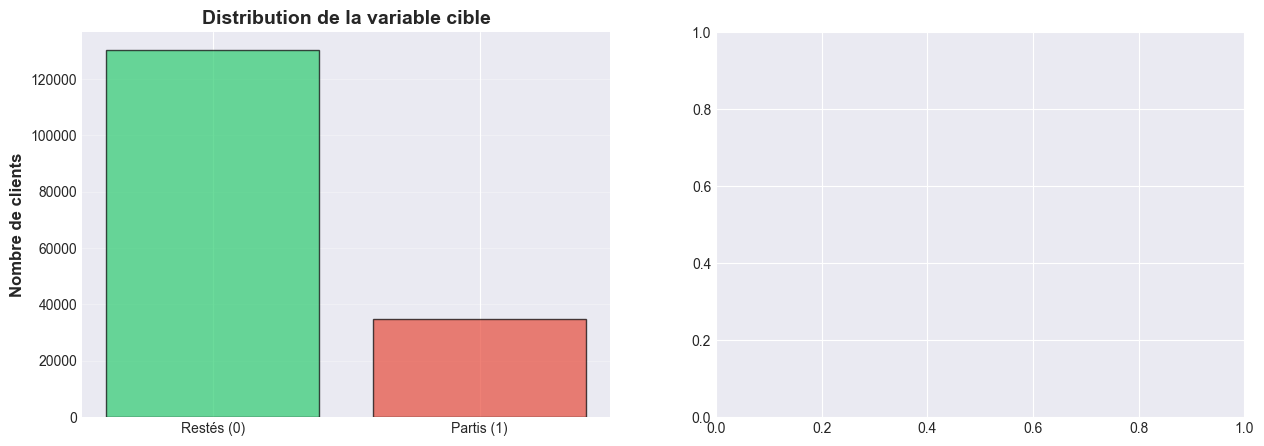

In [15]:
# Visualisation de la distribution de la cible
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique en barres
ax1 = axes[0]
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['Restés (0)', 'Partis (1)'], target_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Nombre de clients', fontsize=12, fontweight='bold')
ax1.set_title('Distribution de la variable cible', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

In [16]:
# Ajouter les valeurs sur les barres
for bar, count, pct in zip(bars, target_counts.values, target_pct.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({pct:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

In [17]:
# Graphique en camembert
ax2 = axes[1]
ax2.pie(target_counts.values, labels=['Restés (0)', 'Partis (1)'], 
        autopct='%1.1f%%', colors=colors, startangle=90,
        explode=(0, 0.1), shadow=True)
ax2.set_title('Proportion de churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### ANALYSE UNIVARIÉE DES VARIABLES NUMÉRIQUES

In [18]:
# Identifier les colonnes numériques (exclure la cible et l'ID si présent)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'Exited' in numeric_cols:
    numeric_cols.remove('Exited')
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'CustomerId' in numeric_cols:
    numeric_cols.remove('CustomerId')

print(f"Variables numériques à analyser: {len(numeric_cols)}")
print(f"   {', '.join(numeric_cols)}")

Variables numériques à analyser: 8
   CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary


In [19]:
# Statistiques détaillées pour chaque variable numérique
print("\n" + "="*80)
print("STATISTIQUES DÉTAILLÉES DES VARIABLES NUMÉRIQUES")
print("="*80 + "\n")

for col in numeric_cols:
    print(f"\n {col.upper()}")
    print("-" * 60)
    
    data = train_df[col]
    
    stats_dict = {
        'Moyenne': data.mean(),
        'Médiane': data.median(),
        'Écart-type': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Q1 (25%)': data.quantile(0.25),
        'Q3 (75%)': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    
    for key, value in stats_dict.items():
        print(f"  {key:15s}: {value:,.2f}")
    
    # Détection des outliers (méthode IQR)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"  {'Outliers':15s}: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")


STATISTIQUES DÉTAILLÉES DES VARIABLES NUMÉRIQUES


 CREDITSCORE
------------------------------------------------------------
  Moyenne        : 656.45
  Médiane        : 659.00
  Écart-type     : 80.10
  Min            : 350.00
  Max            : 850.00
  Q1 (25%)       : 597.00
  Q3 (75%)       : 710.00
  IQR            : 113.00
  Skewness       : -0.06
  Kurtosis       : -0.07
  Outliers       : 253 (0.15%)

 AGE
------------------------------------------------------------
  Moyenne        : 38.13
  Médiane        : 37.00
  Écart-type     : 8.87
  Min            : 18.00
  Max            : 92.00
  Q1 (25%)       : 32.00
  Q3 (75%)       : 42.00
  IQR            : 10.00
  Skewness       : 0.97
  Kurtosis       : 1.53
  Outliers       : 6394 (3.87%)

 TENURE
------------------------------------------------------------
  Moyenne        : 5.02
  Médiane        : 5.00
  Écart-type     : 2.81
  Min            : 0.00
  Max            : 10.00
  Q1 (25%)       : 3.00
  Q3 (75%)       : 7.00
 

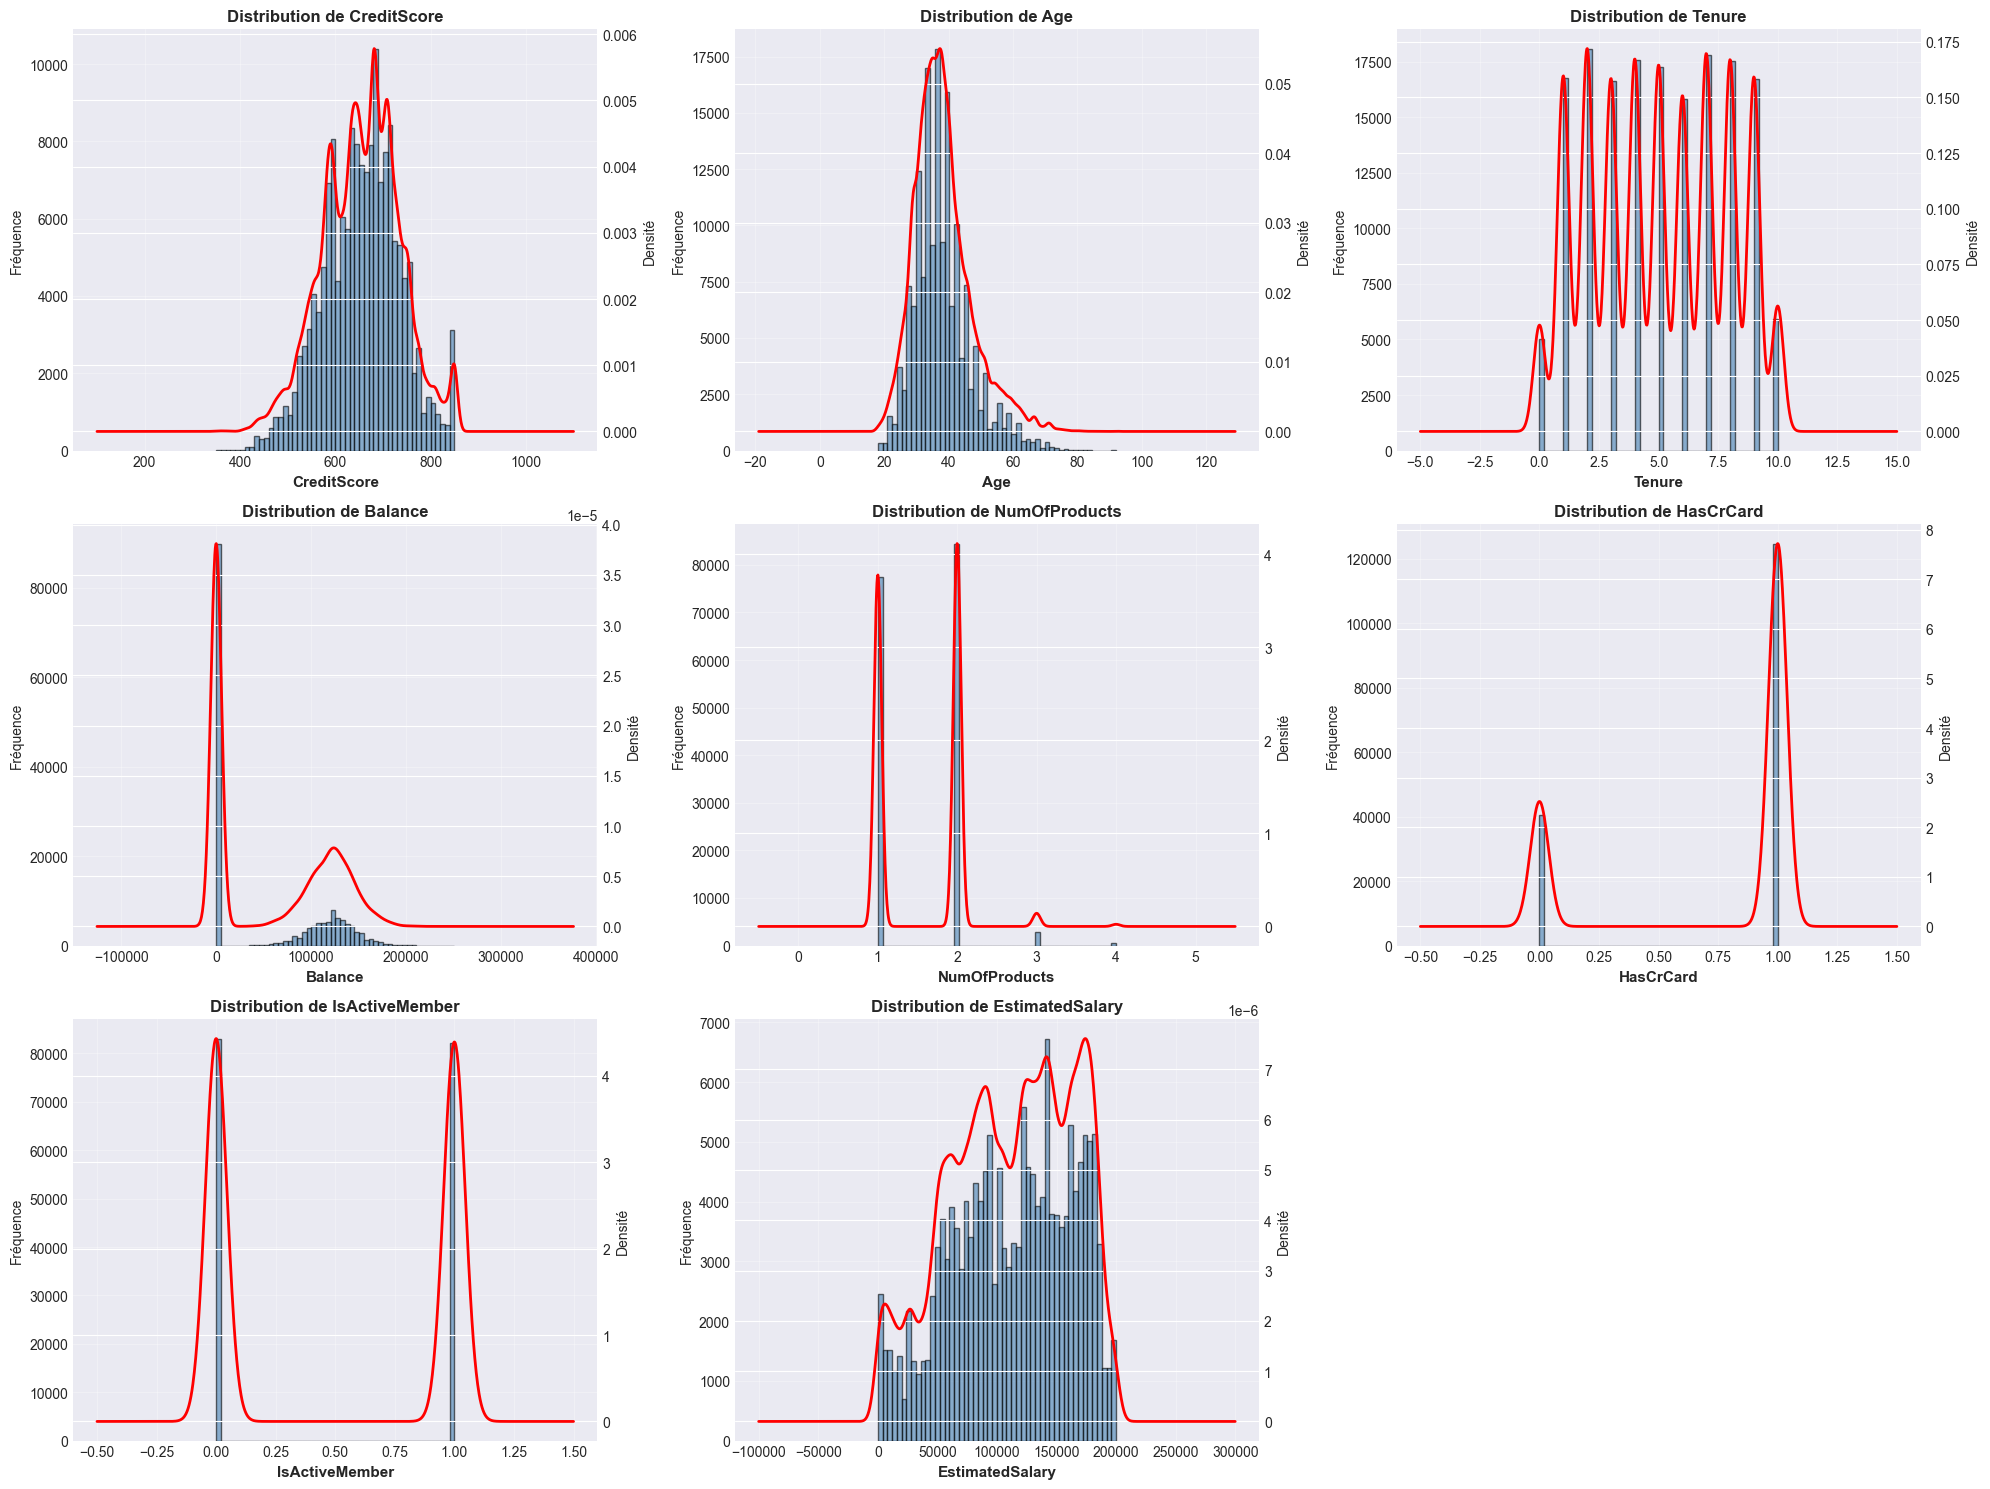

In [20]:
# Visualisation des distributions
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Histogramme avec KDE
    ax.hist(train_df[col].dropna(), bins=50, alpha=0.6, color='steelblue', edgecolor='black')
    ax2 = ax.twinx()
    train_df[col].dropna().plot(kind='kde', ax=ax2, color='red', linewidth=2)
    
    ax.set_xlabel(col, fontsize=11, fontweight='bold')
    ax.set_ylabel('Fréquence', fontsize=10)
    ax2.set_ylabel('Densité', fontsize=10)
    ax.set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3)

# Masquer les axes non utilisés
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

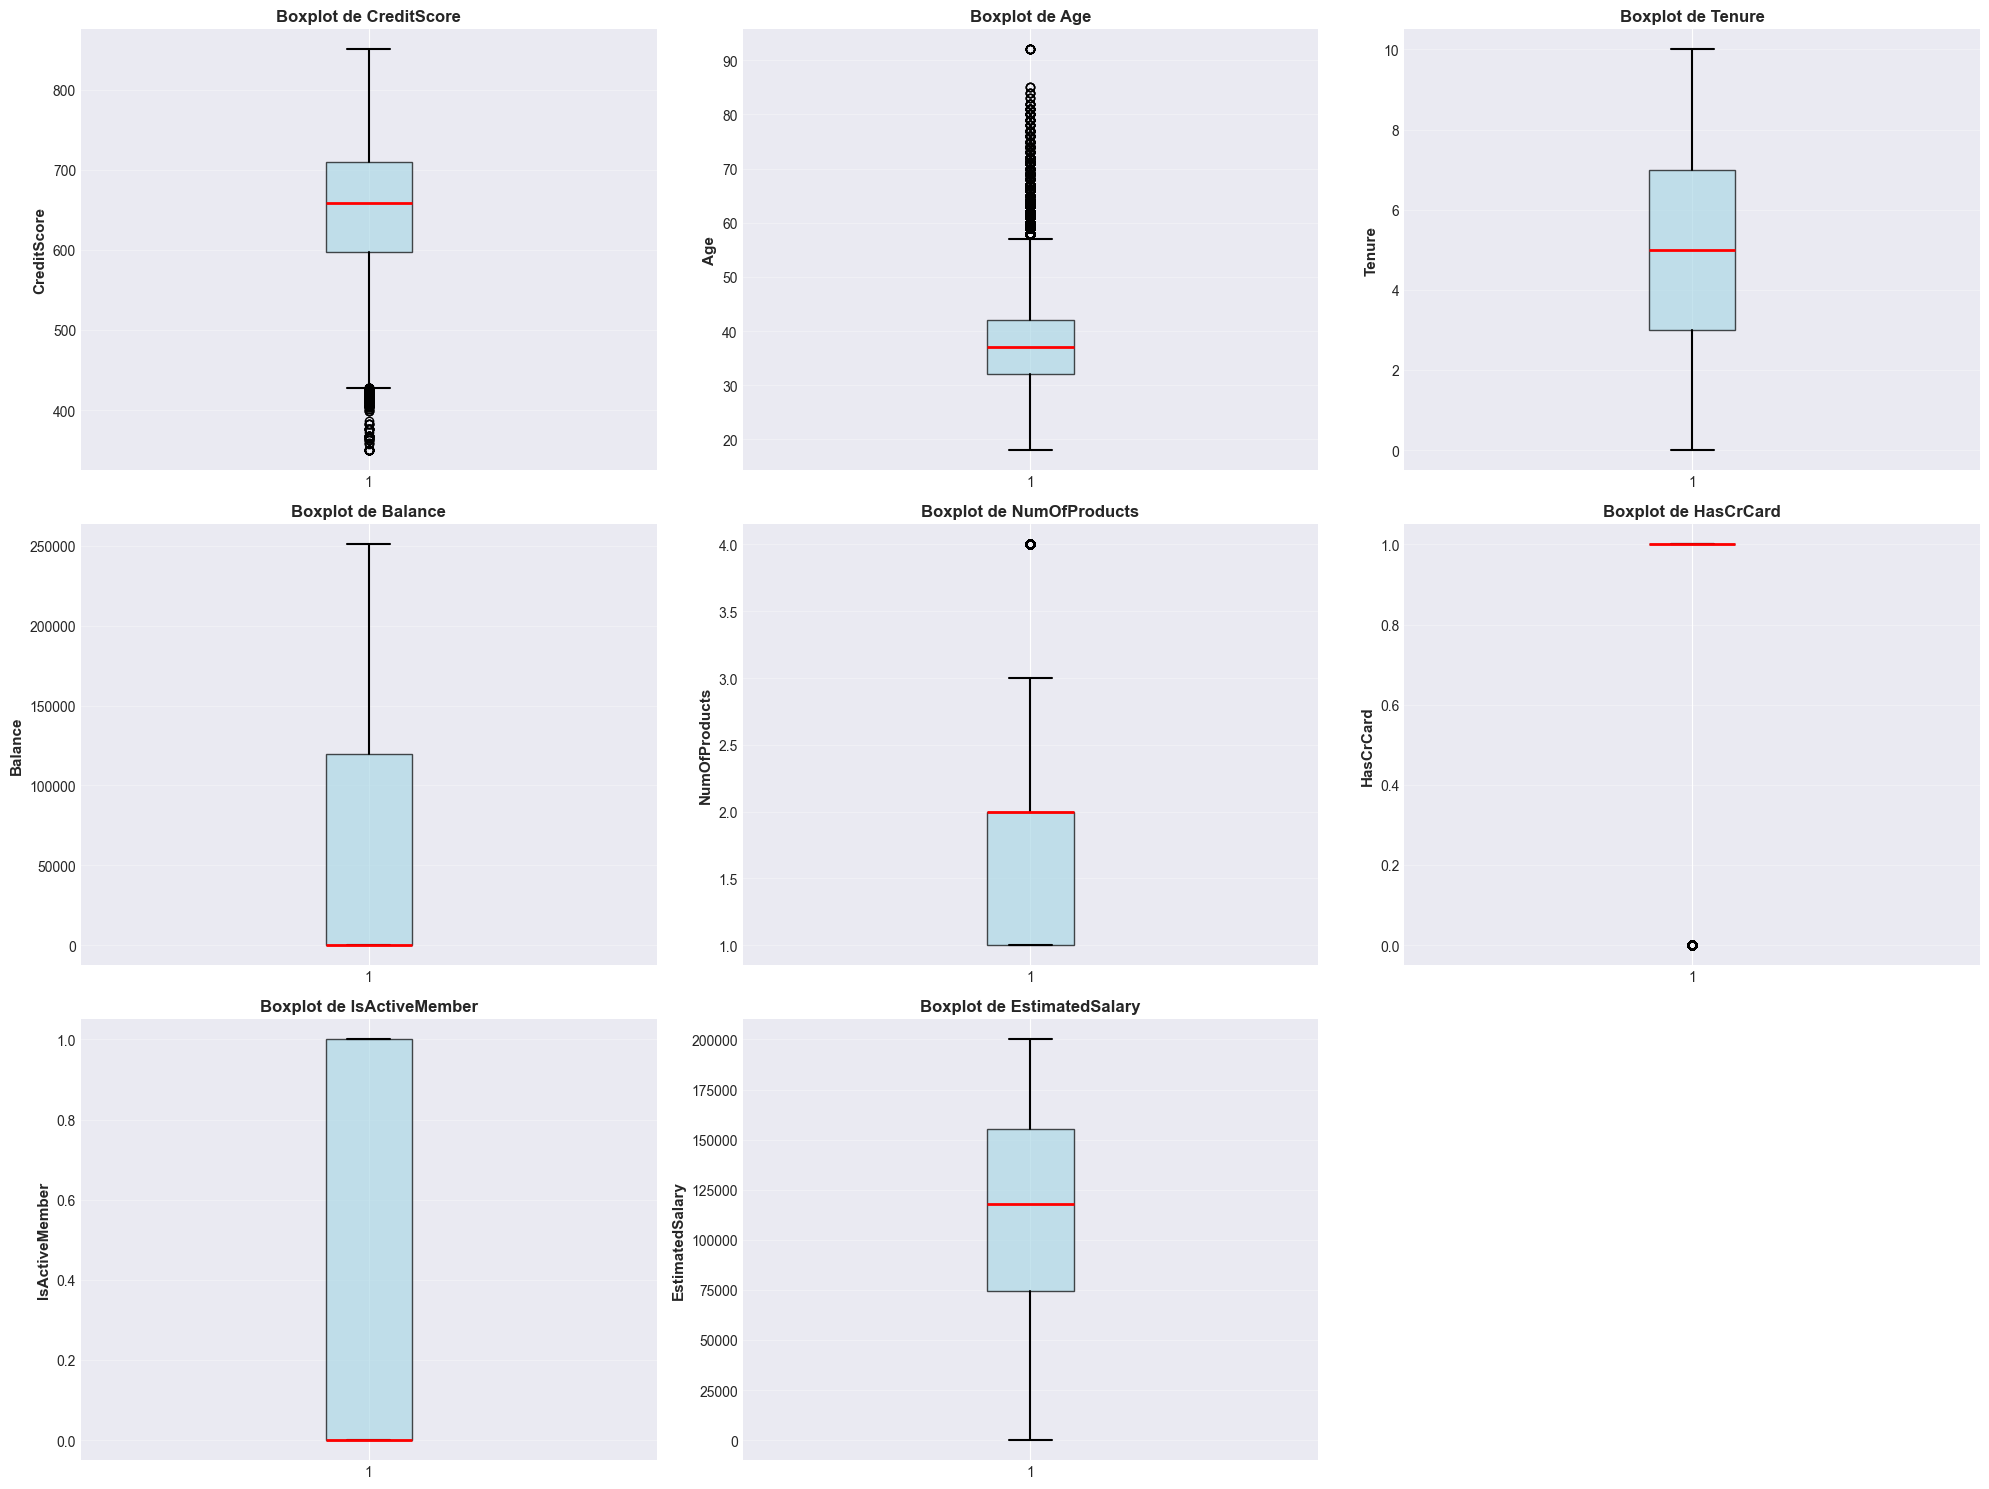

In [21]:
# Boxplots pour détecter les outliers
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    box = ax.boxplot(train_df[col].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='black', linewidth=1.5),
                     capprops=dict(color='black', linewidth=1.5))
    
    ax.set_ylabel(col, fontsize=11, fontweight='bold')
    ax.set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

# Masquer les axes non utilisés
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


### ANALYSE BIVARIÉE : RELATION AVEC LE CHURN

In [22]:
print("="*80)
print("ANALYSE BIVARIÉE: VARIABLES vs CHURN")
print("="*80)

ANALYSE BIVARIÉE: VARIABLES vs CHURN


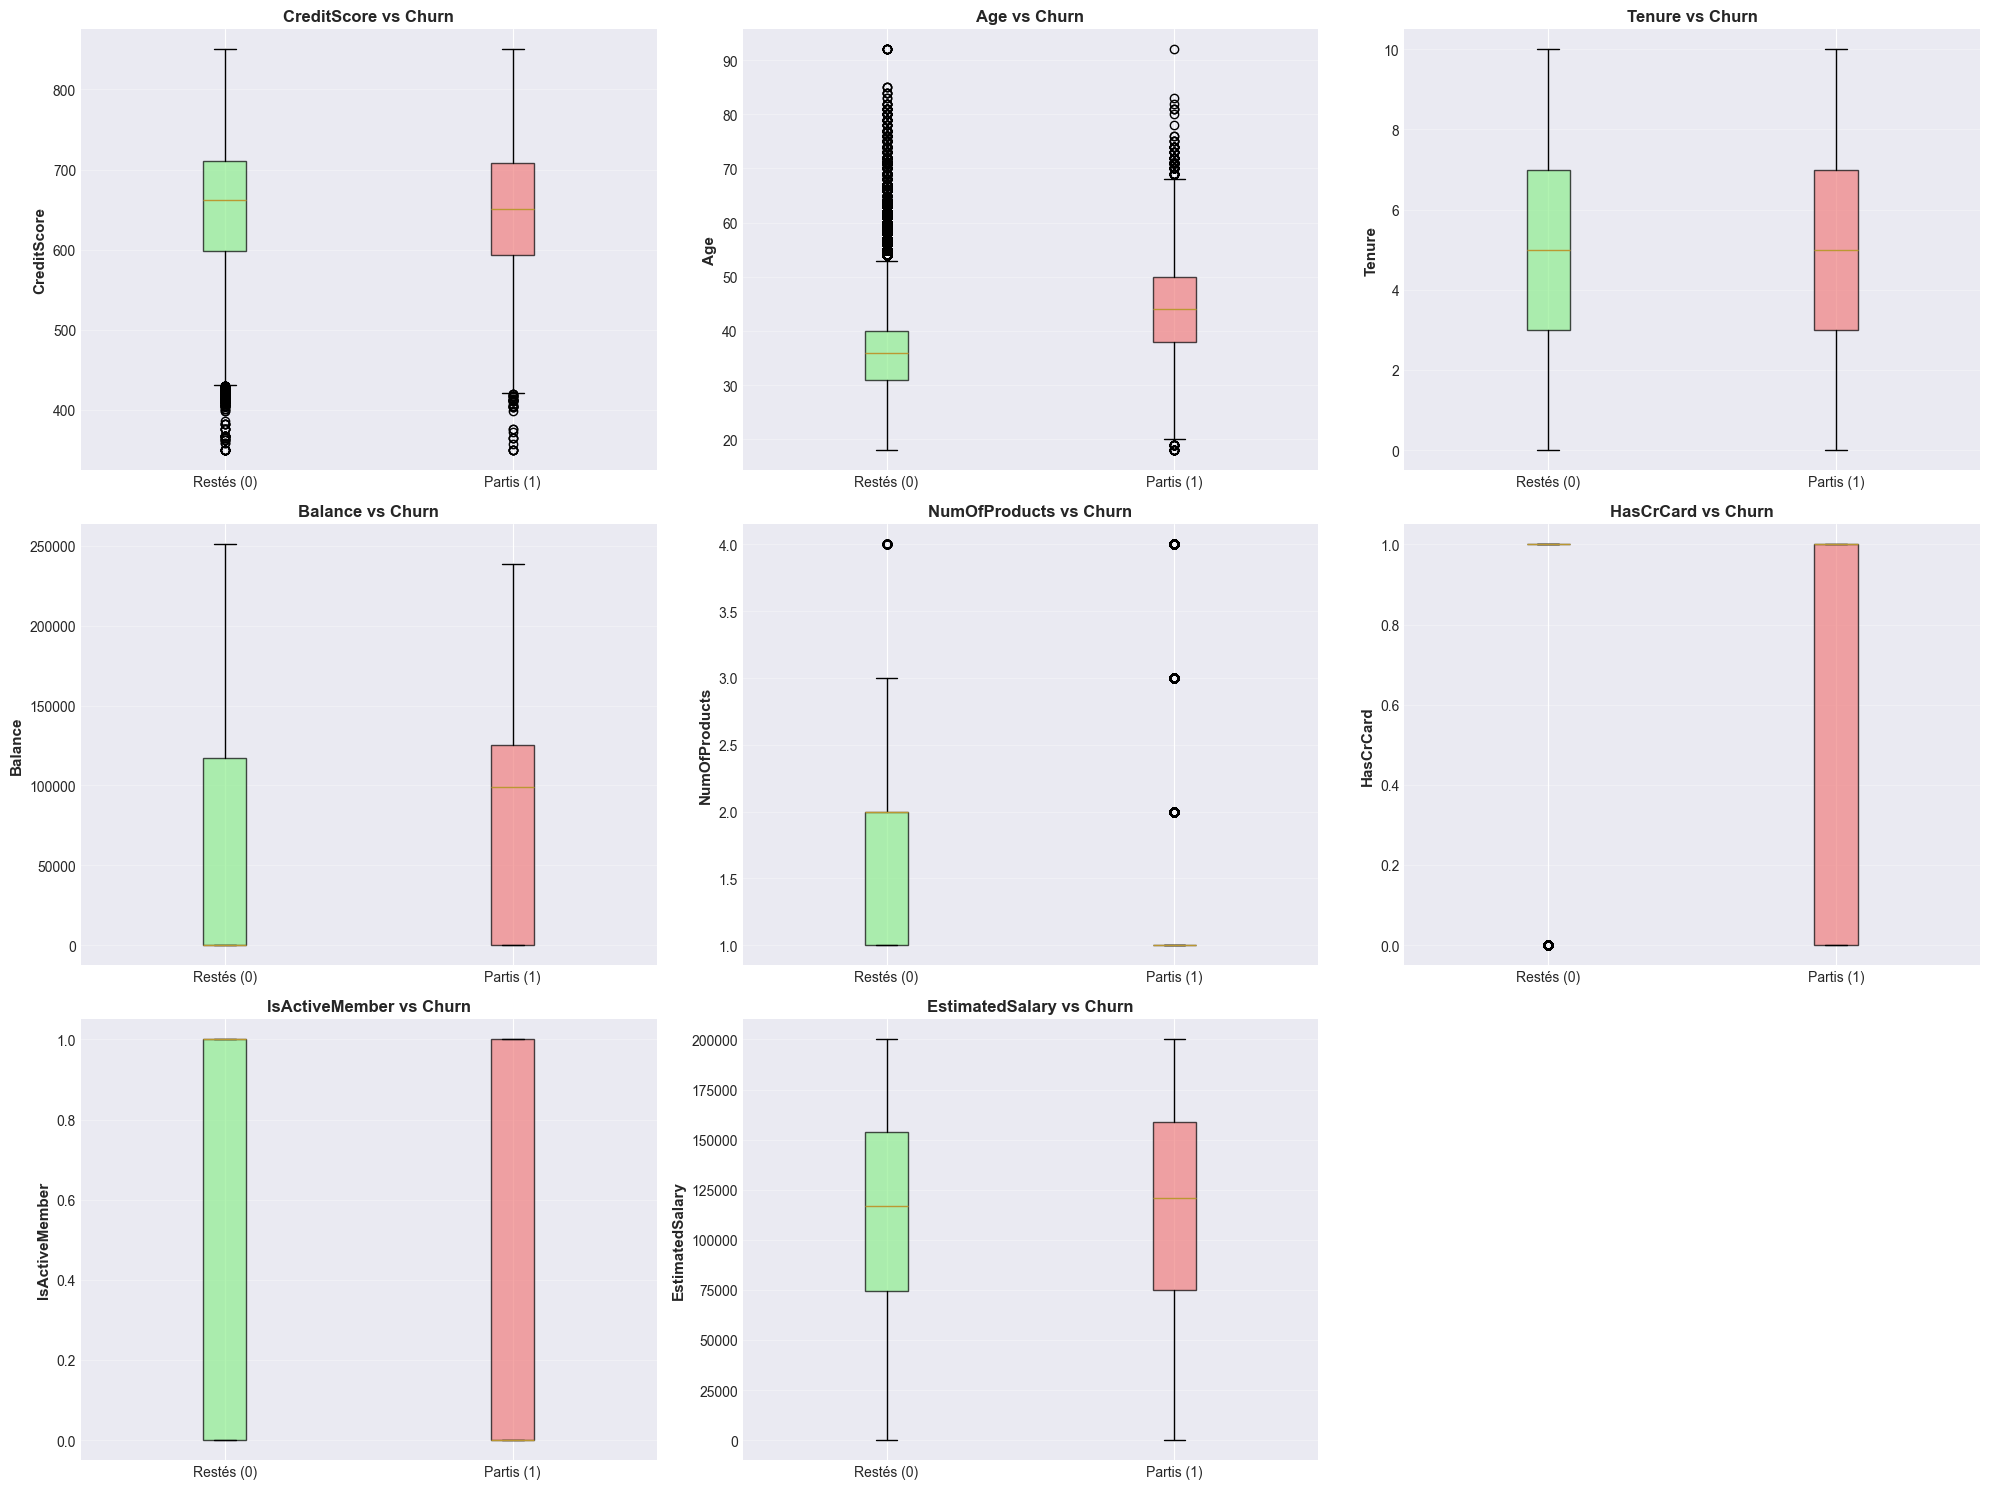

In [23]:
# Variables numériques vs Churn
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Boxplot comparatif
    data_to_plot = [train_df[train_df['Exited'] == 0][col].dropna(),
                    train_df[train_df['Exited'] == 1][col].dropna()]
    
    bp = ax.boxplot(data_to_plot, labels=['Restés (0)', 'Partis (1)'],
                    patch_artist=True)
    
    # Colorier les boxplots
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(col, fontsize=11, fontweight='bold')
    ax.set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

# Masquer les axes non utilisés
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [24]:
# Test statistique : différence de moyenne entre les churners et non-churners
print("\n TESTS STATISTIQUES: Différence de moyennes (T-test)\n")

for col in numeric_cols:
    group_0 = train_df[train_df['Exited'] == 0][col].dropna()
    group_1 = train_df[train_df['Exited'] == 1][col].dropna()
    
    # T-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    
    # Moyennes
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    diff = mean_1 - mean_0
    diff_pct = (diff / mean_0) * 100 if mean_0 != 0 else 0
    
    print(f" {col}:")
    print(f"   Moyenne Restés:  {mean_0:,.2f}")
    print(f"   Moyenne Partis:  {mean_1:,.2f}")
    print(f"   Différence:      {diff:,.2f} ({diff_pct:+.2f}%)")
    print(f"   P-value:         {p_value:.4f}", end="")
    
    if p_value < 0.001:
        print(" *** (Très significatif)")
    elif p_value < 0.01:
        print(" ** (Significatif)")
    elif p_value < 0.05:
        print(" * (Légèrement significatif)")
    else:
        print(" (Non significatif)")
    print()


 TESTS STATISTIQUES: Différence de moyennes (T-test)

 CreditScore:
   Moyenne Restés:  657.59
   Moyenne Partis:  652.22
   Différence:      -5.37 (-0.82%)
   P-value:         0.0000 *** (Très significatif)

 Age:
   Moyenne Restés:  36.56
   Moyenne Partis:  43.96
   Différence:      7.40 (+20.23%)
   P-value:         0.0000 *** (Très significatif)

 Tenure:
   Moyenne Restés:  5.05
   Moyenne Partis:  4.91
   Différence:      -0.13 (-2.66%)
   P-value:         0.0000 *** (Très significatif)

 Balance:
   Moyenne Restés:  51,255.81
   Moyenne Partis:  71,209.98
   Différence:      19,954.17 (+38.93%)
   P-value:         0.0000 *** (Très significatif)

 NumOfProducts:
   Moyenne Restés:  1.62
   Moyenne Partis:  1.33
   Différence:      -0.29 (-17.79%)
   P-value:         0.0000 *** (Très significatif)

 HasCrCard:
   Moyenne Restés:  0.76
   Moyenne Partis:  0.74
   Différence:      -0.02 (-3.08%)
   P-value:         0.0000 *** (Très significatif)

 IsActiveMember:
   Moyenne Restés

### ANALYSE DES VARIABLES CATÉGORIELLES vs CHURN

In [25]:
# Variables catégorielles
categorical_cols = ['Geography', 'Gender']

for col in categorical_cols:
    print(f"\n{'='*80}")
    print(f"ANALYSE: {col.upper()} vs CHURN")
    print('='*80 + "\n")
    
    # Table de contingence
    contingency_table = pd.crosstab(train_df[col], train_df['Exited'], 
                                    margins=True, margins_name='Total')
    print("Table de contingence:")
    display(contingency_table)
    
    # Pourcentages
    contingency_pct = pd.crosstab(train_df[col], train_df['Exited'], 
                                  normalize='index') * 100
    print(f"\n Taux de churn par {col} (%):")
    display(contingency_pct.round(2))
    
    # Test du Chi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])
    print(f"\n Test du Chi2:")
    print(f"   Chi2 statistic: {chi2:.4f}")
    print(f"   P-value:        {p_value:.4f}", end="")
    
    if p_value < 0.001:
        print(" *** (Très significatif - forte association)")
    elif p_value < 0.01:
        print(" ** (Significatif)")
    elif p_value < 0.05:
        print(" * (Légèrement significatif)")
    else:
        print(" (Non significatif)")


ANALYSE: GEOGRAPHY vs CHURN

Table de contingence:


Exited,0,1,Total
Geography,,,
France,78643,15572,94215
Germany,21492,13114,34606
Spain,29978,6235,36213
Total,130113,34921,165034



 Taux de churn par Geography (%):


Exited,0,1
Geography,,
France,83.47,16.53
Germany,62.10,37.90
Spain,82.78,17.22



 Test du Chi2:
   Chi2 statistic: 7358.6738
   P-value:        0.0000 *** (Très significatif - forte association)

ANALYSE: GENDER vs CHURN

Table de contingence:


Exited,0,1,Total
Gender,,,
Female,51779,20105,71884
Male,78334,14816,93150
Total,130113,34921,165034



 Taux de churn par Gender (%):


Exited,0,1
Gender,,
Female,72.03,27.97
Male,84.09,15.91



 Test du Chi2:
   Chi2 statistic: 3538.4525
   P-value:        0.0000 *** (Très significatif - forte association)


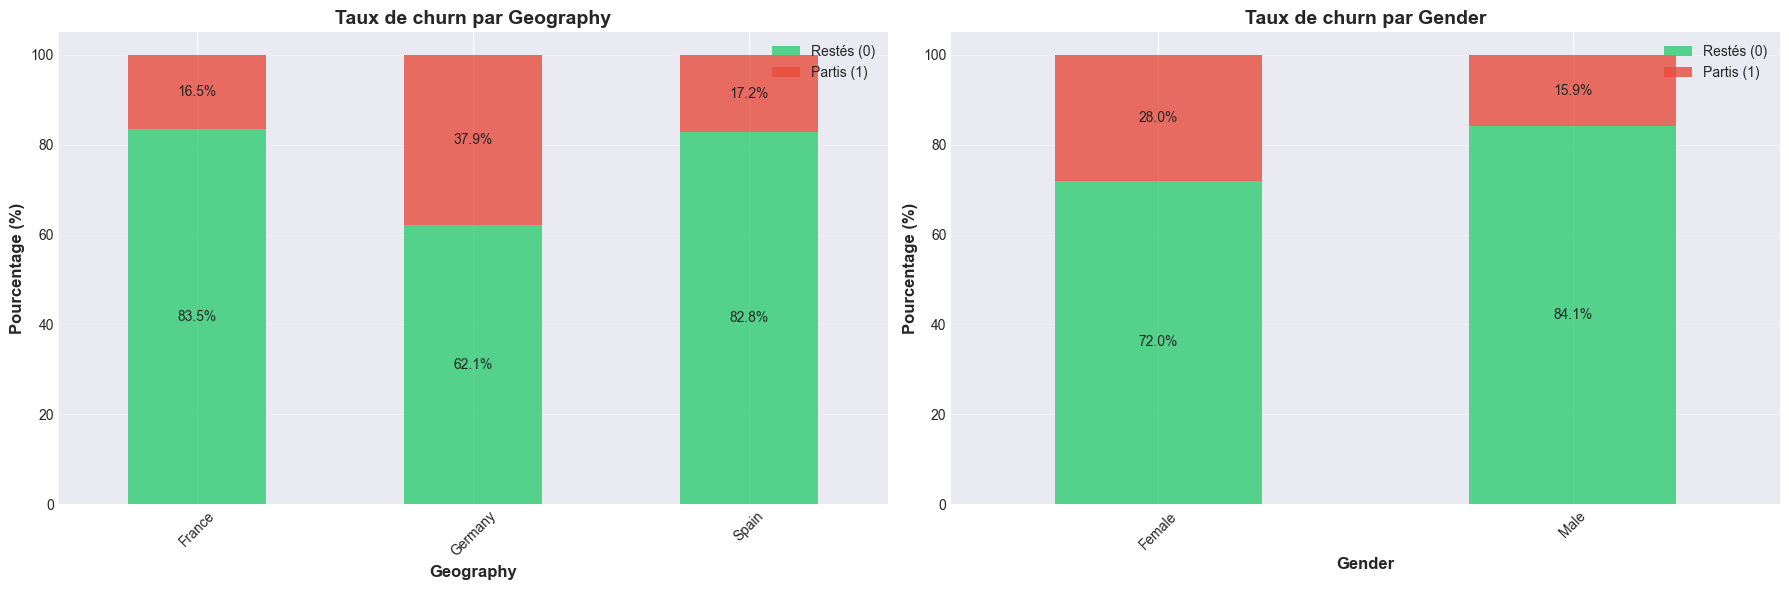

In [26]:
# Visualisation des variables catégorielles vs Churn
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Créer un DataFrame pour le graphique
    churn_by_cat = train_df.groupby([col, 'Exited']).size().unstack(fill_value=0)
    churn_pct = churn_by_cat.div(churn_by_cat.sum(axis=1), axis=0) * 100
    
    # Barplot empilé
    churn_pct.plot(kind='bar', stacked=True, ax=ax, 
                   color=['#2ecc71', '#e74c3c'], alpha=0.8)
    
    ax.set_title(f'Taux de churn par {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Pourcentage (%)', fontsize=12, fontweight='bold')
    ax.legend(['Restés (0)', 'Partis (1)'], loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

### MATRICE DE CORRÉLATION

In [27]:
# Calculer la matrice de corrélation
correlation_matrix = train_df[numeric_cols + ['Exited']].corr()
correlation_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.01,0.00,0.01,0.01,-0.00,0.01,-0.00,-0.03
Age,-0.01,1.00,-0.01,0.06,-0.10,-0.01,0.00,-0.01,0.34
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.01,-0.01,0.00,-0.02
Balance,0.01,0.06,-0.01,1.00,-0.36,-0.02,-0.02,0.01,0.13
NumOfProducts,0.01,-0.10,0.01,-0.36,1.00,0.01,0.04,-0.00,-0.21
HasCrCard,-0.00,-0.01,0.01,-0.02,0.01,1.00,-0.02,0.00,-0.02
IsActiveMember,0.01,0.00,-0.01,-0.02,0.04,-0.02,1.00,-0.01,-0.21
EstimatedSalary,-0.00,-0.01,0.00,0.01,-0.00,0.00,-0.01,1.00,0.02
Exited,-0.03,0.34,-0.02,0.13,-0.21,-0.02,-0.21,0.02,1.00


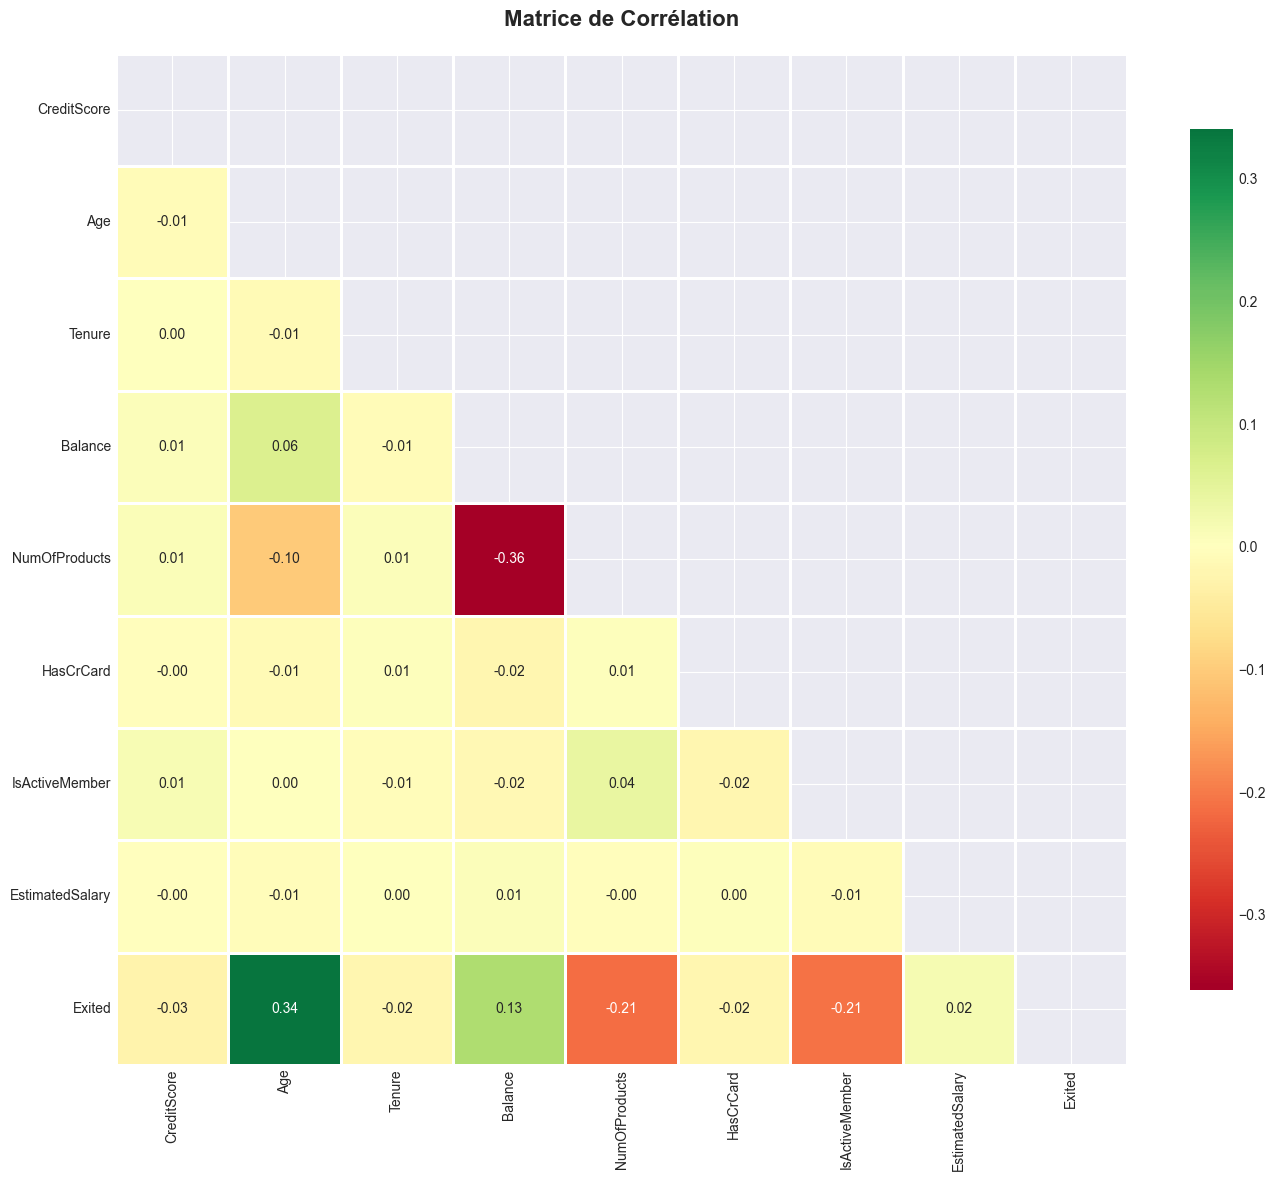

In [28]:
# Visualisation avec seaborn
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [29]:
# Corrélations avec la variable cible
print("\n CORRÉLATIONS AVEC LA VARIABLE CIBLE (Exited)\n")
target_corr = correlation_matrix['Exited'].drop('Exited').sort_values(ascending=False)

for var, corr in target_corr.items():
    print(f"  {var:20s}: {corr:+.4f}", end="")
    if abs(corr) > 0.3:
        print(" (Corrélation forte)")
    elif abs(corr) > 0.1:
        print(" (Corrélation modérée)")
    else:
        print(" (Corrélation faible)")


 CORRÉLATIONS AVEC LA VARIABLE CIBLE (Exited)

  Age                 : +0.3408 (Corrélation forte)
  Balance             : +0.1297 (Corrélation modérée)
  EstimatedSalary     : +0.0188 (Corrélation faible)
  Tenure              : -0.0196 (Corrélation faible)
  HasCrCard           : -0.0221 (Corrélation faible)
  CreditScore         : -0.0274 (Corrélation faible)
  IsActiveMember      : -0.2102 (Corrélation modérée)
  NumOfProducts       : -0.2146 (Corrélation modérée)


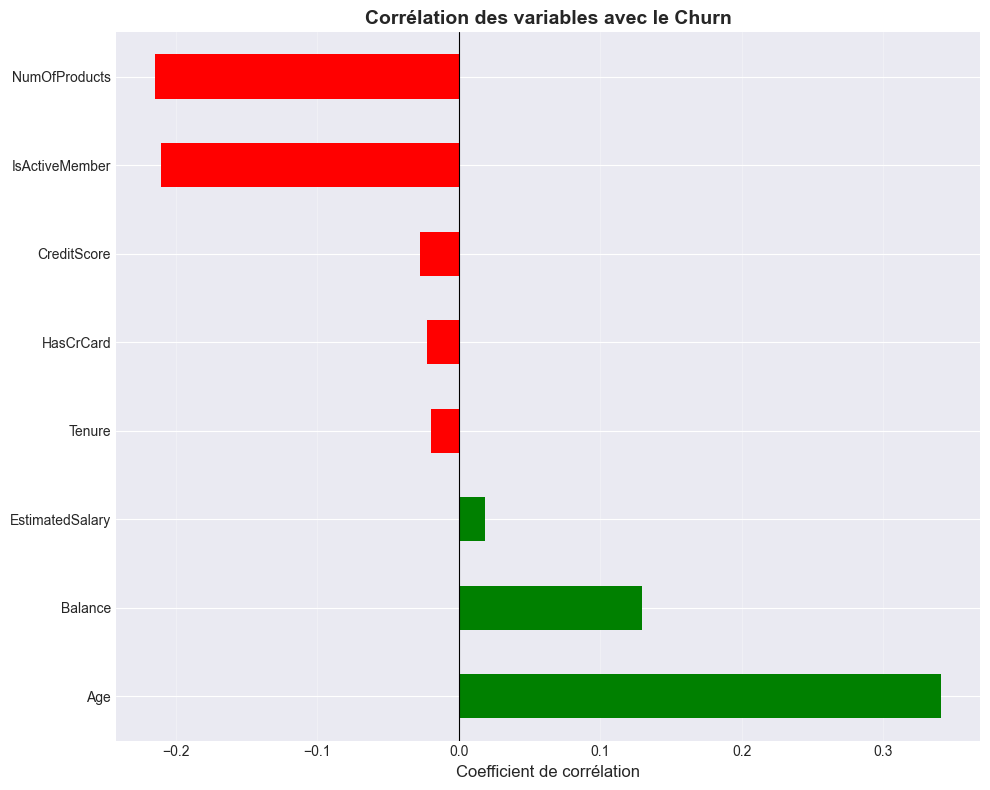

In [30]:
# Visualisation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', color=['red' if x < 0 else 'green' for x in target_corr])
plt.title('Corrélation des variables avec le Churn', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient de corrélation', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### ANALYSES MULTIVARIÉES AVANCÉES

Analyse des 4 variables les plus corrélées: Age, NumOfProducts, IsActiveMember, Balance


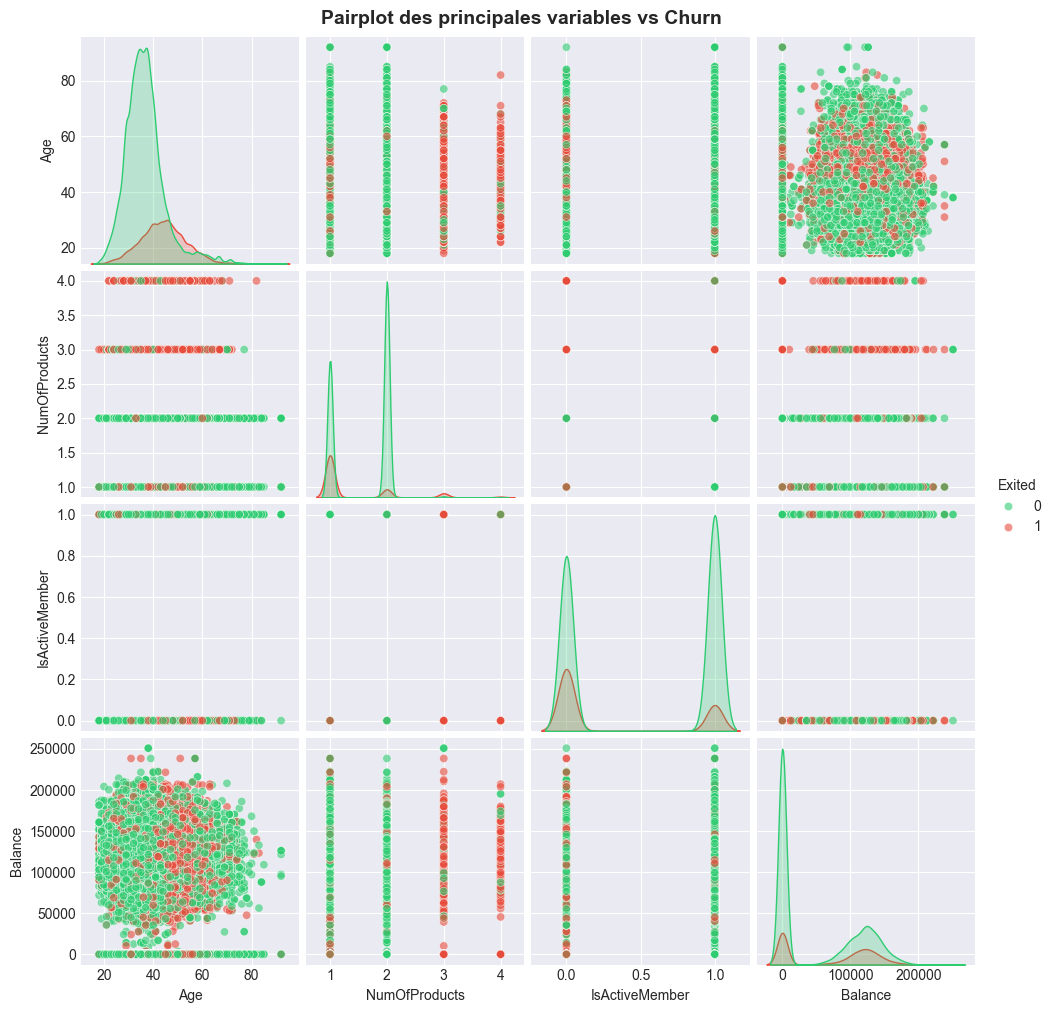

In [31]:
# Pairplot pour les variables les plus corrélées avec Exited
top_features = target_corr.abs().nlargest(4).index.tolist()
print(f"Analyse des 4 variables les plus corrélées: {', '.join(top_features)}")

sns.pairplot(train_df[top_features + ['Exited']], 
             hue='Exited', palette={0: '#2ecc71', 1: '#e74c3c'},
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot des principales variables vs Churn', y=1.01, fontsize=14, fontweight='bold')
plt.show()

### RÉSUMÉ DES INSIGHTS CLÉS

In [32]:
print("="*80)
print("RÉSUMÉ DES INSIGHTS CLÉS")
print("="*80)

RÉSUMÉ DES INSIGHTS CLÉS


In [34]:
print(f"""
VARIABLE CIBLE:
   • Taux de churn: {target_pct[1]:.2f}%
   • Ratio déséquilibre: 1:{imbalance_ratio:.2f}
   • Action recommandée: {'Utiliser SMOTE ou class_weight' if imbalance_ratio > 3 else 'Dataset équilibré'}

QUALITÉ DES DONNÉES:
   • Valeurs manquantes: {'Aucune ' if train_df.isnull().sum().sum() == 0 else 'Présentes'}
   • Dataset: {train_df.shape[0]:,} observations × {train_df.shape[1]} variables

VARIABLES IMPORTANTES (corrélation avec Churn):
""")


VARIABLE CIBLE:
   • Taux de churn: 21.16%
   • Ratio déséquilibre: 1:3.73
   • Action recommandée: Utiliser SMOTE ou class_weight

QUALITÉ DES DONNÉES:
   • Valeurs manquantes: Aucune 
   • Dataset: 165,034 observations × 14 variables

VARIABLES IMPORTANTES (corrélation avec Churn):



In [35]:
for i, (var, corr) in enumerate(target_corr.abs().nlargest(5).items(), 1):
    print(f"   {i}. {var:20s}: {target_corr[var]:+.4f}")

   1. Age                 : +0.3408
   2. NumOfProducts       : -0.2146
   3. IsActiveMember      : -0.2102
   4. Balance             : +0.1297
   5. CreditScore         : -0.0274


In [36]:
print(f"""
PROCHAINES ÉTAPES:
   1. Feature Engineering (interactions, transformations)
   2. Preprocessing (encoding, scaling, train/test split)
   3. Modélisation (test de plusieurs algorithmes)
   4. Optimisation des hyperparamètres
   5. Évaluation et interprétabilité du modèle

Analyse exploratoire terminée!
""")


PROCHAINES ÉTAPES:
   1. Feature Engineering (interactions, transformations)
   2. Preprocessing (encoding, scaling, train/test split)
   3. Modélisation (test de plusieurs algorithmes)
   4. Optimisation des hyperparamètres
   5. Évaluation et interprétabilité du modèle

Analyse exploratoire terminée!



### SAUVEGARDE DES RÉSULTATS

In [46]:
# Sauvegarder les statistiques clés
summary_stats = str({
    'dataset_shape': train_df.shape,
    'churn_rate': target_pct[1],
    'imbalance_ratio': imbalance_ratio,
    'missing_values': train_df.isnull().sum().sum(),
    #'duplicates': duplicates,
    'top_correlated_features': target_corr.abs().nlargest(5).to_dict()
})

In [48]:
# Nous décidons de sauvegarder cela dans un fichier JSON pour référence
import json
with open('../data/processed/eda_summary.json', 'w', encoding='utf-8') as f:
    f.write(summary_stats)
    #json.dump(summary_stats, f, indent=2, ensure_ascii=False)

print("Résumé de l'analyse sauvegardé dans 'data/processed/eda_summary.json'")

# %%
print("\n" + "="*80)
print("FIN DE L'ANALYSE EXPLORATOIRE")
print("="*80)
print("\nProchain notebook: churn_02_preprocessing.ipynb")

Résumé de l'analyse sauvegardé dans 'data/processed/eda_summary.json'

FIN DE L'ANALYSE EXPLORATOIRE

Prochain notebook: churn_02_preprocessing.ipynb
